# Поиск истины в вине

<img src="https://i.pinimg.com/originals/35/fd/2f/35fd2fdccb58c2250241113f12b55d14.jpg" width="300">


**Предобработка данных**

	- Загрузите данные в Pandas DataFrame.
	- Посчитайте размерность данных (количество строк и стоблцов).
	- Посчитайте количество пропущенных значений в каждой переменной.
	- Выведите тип данных каждой переменной. Переконвертируйте при необходимости.
    - Вина какой области (`province`) получают наилучшие рейтинги?
	- На основе словаря `color` оздайте переменную, в которой закодирован цвет вина (например, при помощи метода [`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) или другого).
    - Удалите наблюдения для которых цвет (`color`) не указан.
	- Визуализируйте распределения числовых переменных.
	- Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.



**Указывайте в коде, какой пункт начали выполнять.**

In [10]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

Загрузите данные в Pandas DataFrame.

In [12]:
df = pd.read_csv('wine_reviews.csv')
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni


Посчитайте размерность данных (количество строк и стоблцов)

In [13]:
a,b,=df.shape
print('Количество строк =', a)
print('Количество столбцов =', b)

Количество строк = 20000
Количество столбцов = 10


In [14]:
print(f"количество столбцов: {len(df.count(axis='rows'))}", f"количество строк: {len(df.count(axis='columns'))}", sep='\n')

количество столбцов: 10
количество строк: 20000


Посчитайте количество пропущенных значений в каждой переменной.

In [15]:
df.isnull().sum()

,0
country,0
description,0
designation,6001
points,0
price,1802
province,0
region_1,3457
region_2,11942
variety,0
winery,0


In [16]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['Пропущенные значения', 'Процент'])
MissingData

,Пропущенные значения,Процент
region_2,11942,59.710
designation,6001,30.005
region_1,3457,17.285
price,1802,9.010
description,0,0.000
country,0,0.000
province,0,0.000
points,0,0.000
variety,0,0.000
winery,0,0.000


Выведите тип данных каждой переменной. Переконвертируйте при необходимости.

In [17]:
df.dtypes

,0
country,object
description,object
designation,object
points,int64
price,float64
province,object
region_1,object
region_2,object
variety,object
winery,object


In [18]:
df.variety.value_counts()

,count
variety,
Pinot Noir,1945
Chardonnay,1893
Cabernet Sauvignon,1636
Red Blend,1329
Bordeaux-style Red Blend,952
...,...
Pinot Auxerrois,1
Gewürztraminer-Riesling,1
Schwartzriesling,1


Вина какой области (`province`) получают наилучшие рейтинги?

In [19]:
df.nlargest(5,'points')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
323,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
5955,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
17967,US,Impossibly aromatic. Hard to imagine greater c...,Red Wine,100,245.0,California,Rutherford,Napa,Cabernet Blend,Sloan
5195,France,98-100 Barrel sample. The aromas are so rich a...,Barrel sample,99,NaN,Bordeaux,Sauternes,NaN,Bordeaux-style White Blend,Château d'Yquem
7306,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse


In [20]:
r = df[df.points == df.points.max()]

In [21]:
print(f"Наилучшие рейтинги получают вина областей:{r.province.tolist()}")

Наилучшие рейтинги получают вина областей:['Champagne', 'Tuscany', 'California']


In [22]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}

In [23]:
df['color'] = df['variety'].map(color)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red
...,...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie,NaN
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine,red
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata,NaN
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni,NaN


In [24]:
df.isnull().sum()

,0
country,0
description,0
designation,6001
points,0
price,1802
province,0
region_1,3457
region_2,11942
variety,0
winery,0


In [25]:
df.dropna(inplace = True, subset = 'color')

Визуализируйте распределения числовых переменных.

array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

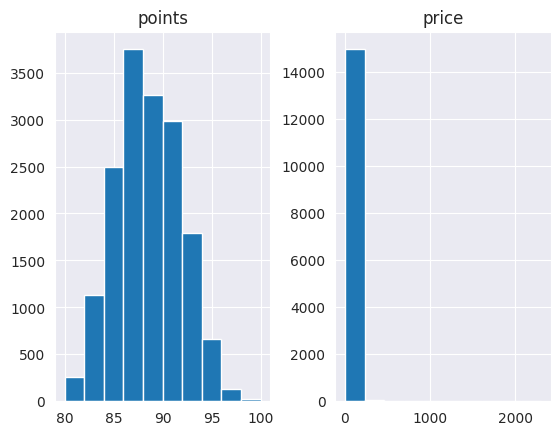

In [26]:
df.hist()

Text(0.4, -0.01, 'Рисунок 1. - Распределение вин по рейтингу')

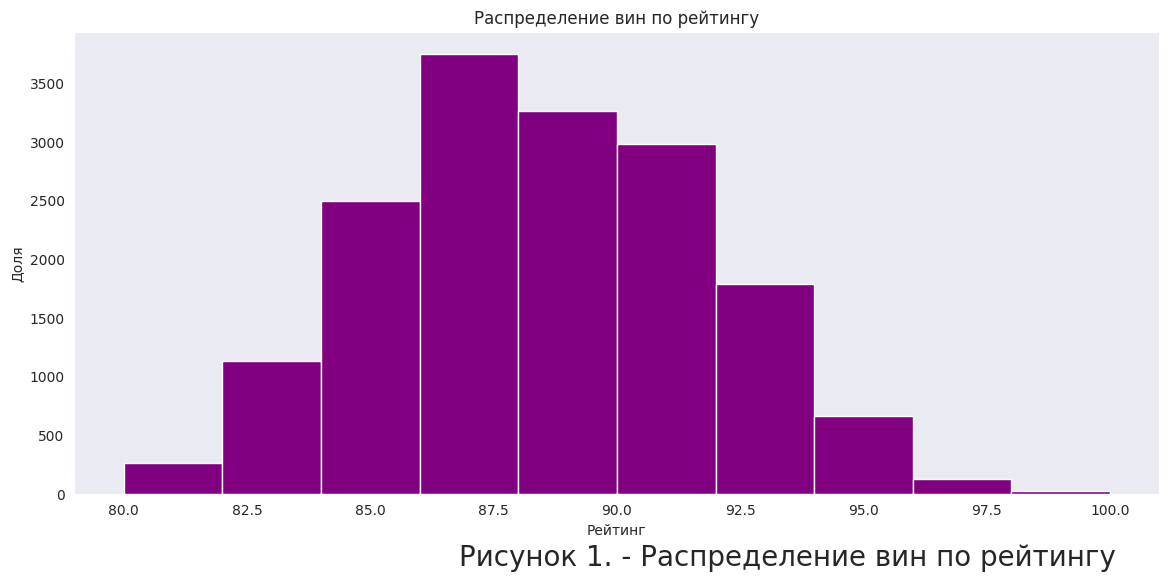

In [27]:
plt.figure(figsize = (14,6))
plt.hist(df.points.to_list(),color='purple')
plt.title('Распределение вин по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Доля')
plt.grid()
plt.figtext(0.4, -0.01, "Рисунок 1. - Распределение вин по рейтингу", fontsize =20)


/tmp/ipython-input-28-2930857788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['points'])


<Axes: xlabel='points', ylabel='Density'>

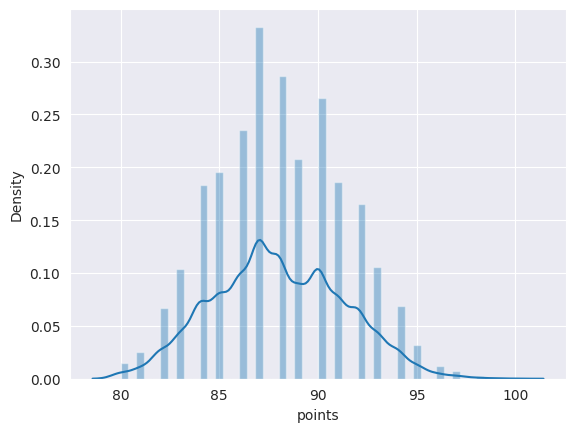

In [28]:
sns.distplot(df['points'])

Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.

In [29]:
a=pd.crosstab(df['country'],df['color'],normalize='index').round(2)
a

color,other,red,white
country,,,
Argentina,0.02,0.84,0.14
Australia,0.03,0.71,0.27
Austria,0.02,0.35,0.63
Brazil,1.00,0.00,0.00
Bulgaria,0.00,0.67,0.33
Canada,0.00,0.86,0.14
Chile,0.02,0.70,0.28
China,0.00,0.00,1.00
Croatia,0.14,0.29,0.57


In [30]:

max_white_wine = a[a['white']==a['white'].max()]
max_white_wine



color,other,red,white
country,,,
China,0.0,0.0,1.0
Georgia,0.0,0.0,1.0
US-France,0.0,0.0,1.0


In [31]:
a.sort_values(by = 'white' , ascending = False)[:5]

color,other,red,white
country,,,
China,0.00,0.00,1.00
US-France,0.00,0.00,1.00
Georgia,0.00,0.00,1.00
Lebanon,0.00,0.33,0.67
Austria,0.02,0.35,0.63


In [32]:
max_red_wine = a[a['red']==a['red'].max()]
max_red_wine

color,other,red,white
country,,,
Luxembourg,0.0,1.0,0.0
Switzerland,0.0,1.0,0.0
Turkey,0.0,1.0,0.0


In [33]:
a=df.groupby(['country','color'])['color'].count().unstack()
a

color,other,red,white
country,,,
Argentina,12.0,528.0,87.0
Australia,14.0,359.0,135.0
Austria,6.0,105.0,189.0
Brazil,2.0,NaN,NaN
Bulgaria,NaN,6.0,3.0
Canada,NaN,18.0,3.0
Chile,13.0,506.0,201.0
China,NaN,NaN,2.0
Croatia,1.0,2.0,4.0


In [34]:
Юрию...#В какой стране доля белого вина наибольшая, а в какой красного?Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного
white_wines = df[df['wine_color'] == 'white']# Фильтруем только белые вина
country_with_max_white = white_wines.loc[white_wines['wine_share'].idxmax()]['province']# страна с максимальной долей белого вина
red_wines = df[df['wine_color'] == 'red']# Фильтруем только красные вина
country_with_max_red = red_wines.loc[red_wines['wine_share'].idxmax()]['province']# страна с максимальной долей красного вина
result = f'В стране {country_with_max_white} наибольшая доля белого вина, а в стране {country_with_max_red} — красного.'
print(result)

SyntaxError: invalid syntax (ipython-input-34-132022012.py, line 1)